In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

In [2]:
df = pd.read_csv('../data/processed/recommendation_training_data_cleaned.csv')

In [3]:
len(df.columns)

23

# PCA

In [4]:
pca = PCA()
pca.fit(df)

PCA()

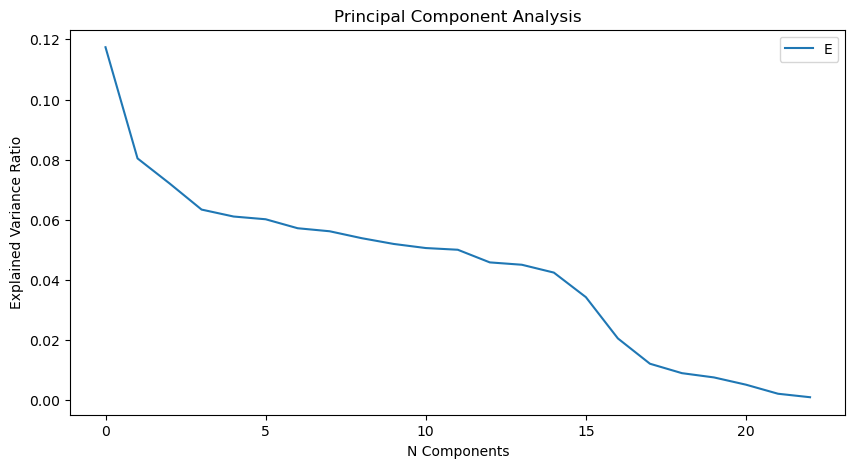

In [5]:
plt.figure(figsize=(10,5))
plt.title('Principal Component Analysis')
plt.plot(pca.explained_variance_ratio_)
plt.legend('Explained Variance')
plt.xlabel('N Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

It appears that 3 is the optimal n_components for PCA

In [6]:
X = df.copy()

pca = PCA(n_components=3)
X_centered = X - X.mean(axis=0)
pca.fit(X_centered)
X_pca = pca.transform(X_centered)

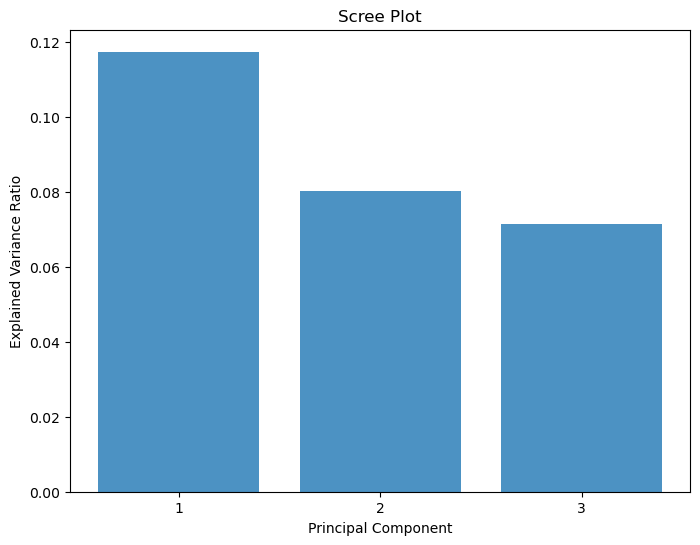

In [24]:
# Get the explained variance ratio for each component
explained_variance_ratio = pca.explained_variance_ratio_

# Create the scree plot
plt.figure(figsize=(8, 6))
plt.bar(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, alpha=0.8, align='center')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot')
plt.xticks(range(1, len(explained_variance_ratio) + 1))

plt.show()

In [8]:
X_pca

array([[-1.61011252,  0.42832901, -0.60192301],
       [-1.66248859, -1.67572294,  2.45086197],
       [-2.54537466,  1.14581434,  0.7668302 ],
       ...,
       [ 2.23098511,  0.07680817,  0.54250701],
       [ 1.77806118,  0.36472613,  1.21722707],
       [ 2.29758525,  0.19043016,  0.20156328]])

# KMeans without PCA

/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

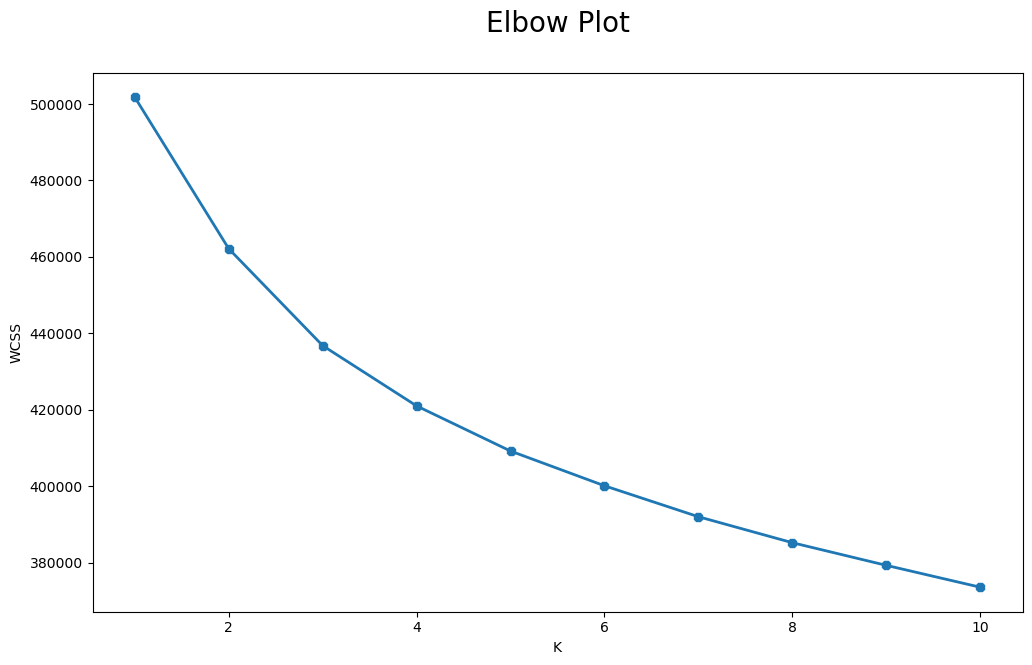

In [9]:
wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X.values)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

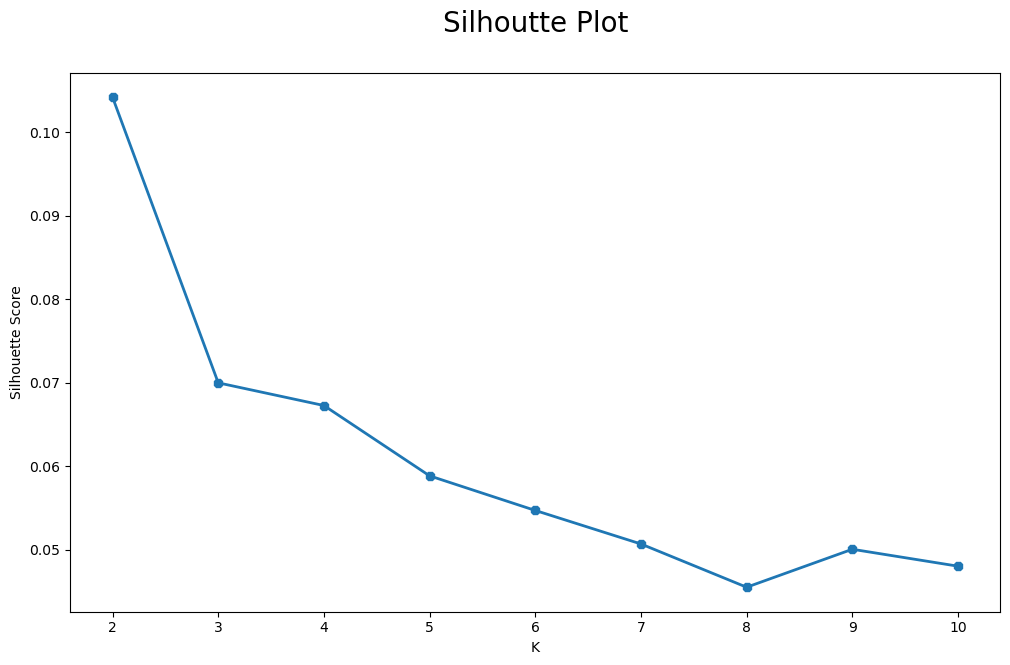

In [10]:
# create a plot of silhoutte score

silhouette = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    
    predictions = kmeans.fit_predict(X.values)
    silhouette.append(metrics.silhouette_score(X, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 11), silhouette, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=2, random_state=42)

kmeans.fit(X.values)

/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [12]:
# Generate labels for the  dataset

labels = kmeans.fit_predict(X.values)
labels

/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, ..., 0, 0, 0], dtype=int32)

In [13]:
kmeans.cluster_centers_

array([[ 0.88763203, -0.11358839,  0.05660266, -0.29342424, -0.15800941,
         0.23623944, -0.05515292, -0.43957932, -0.11521324,  1.22523128,
        -0.26267652,  0.16782962, -0.26988615, -0.1880021 , -0.55542589,
        -0.14956142, -0.4589627 ,  0.13544844,  0.09737645,  0.12056132,
         0.24758999,  0.14508847,  0.11531422],
       [-0.36069542,  0.04615743, -0.02300088,  0.11923497,  0.06420822,
        -0.09599753,  0.02241177,  0.1786261 ,  0.0468177 , -0.49788121,
         0.10674042, -0.06819873,  0.10967011,  0.07639595,  0.22570115,
         0.06077532,  0.18650267,  0.21490554,  0.00525611,  0.14161749,
         0.24837606,  0.06485843,  0.15307185]])

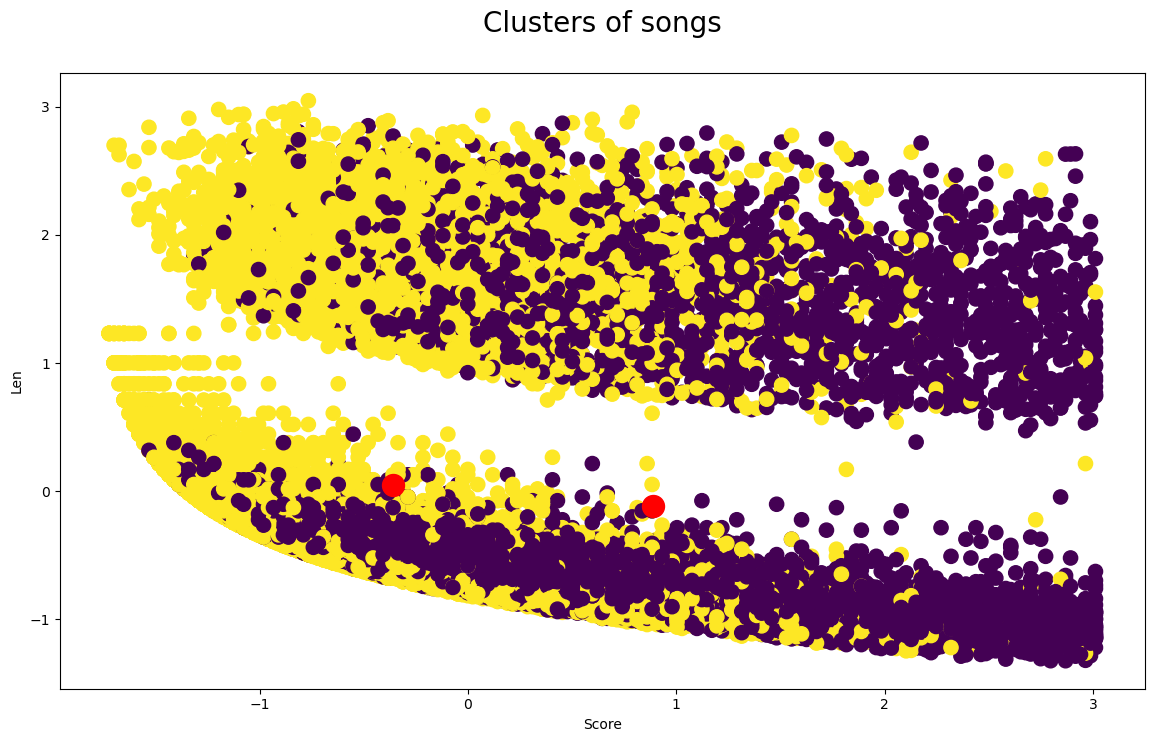

In [14]:
# view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X.values[:, 0], X.values[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Clusters of songs\n', fontsize = 20)
plt.xlabel('Score')
plt.ylabel('Len')
plt.show()

# Kmeans with PCA

/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

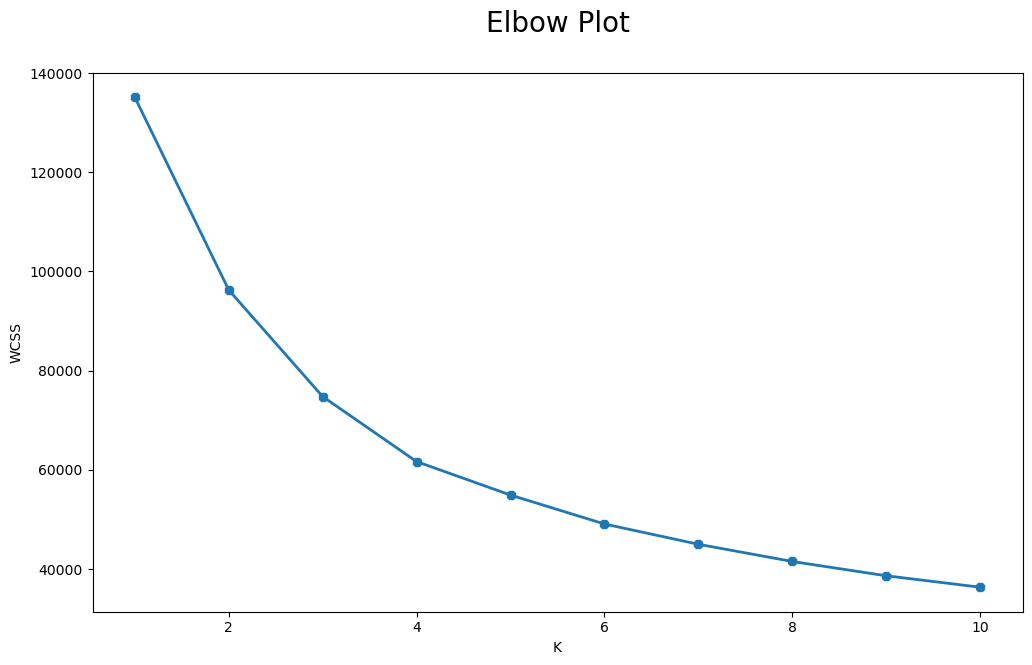

In [15]:
wcss_pca= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X_pca)
    wcss_pca.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss_pca, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will c

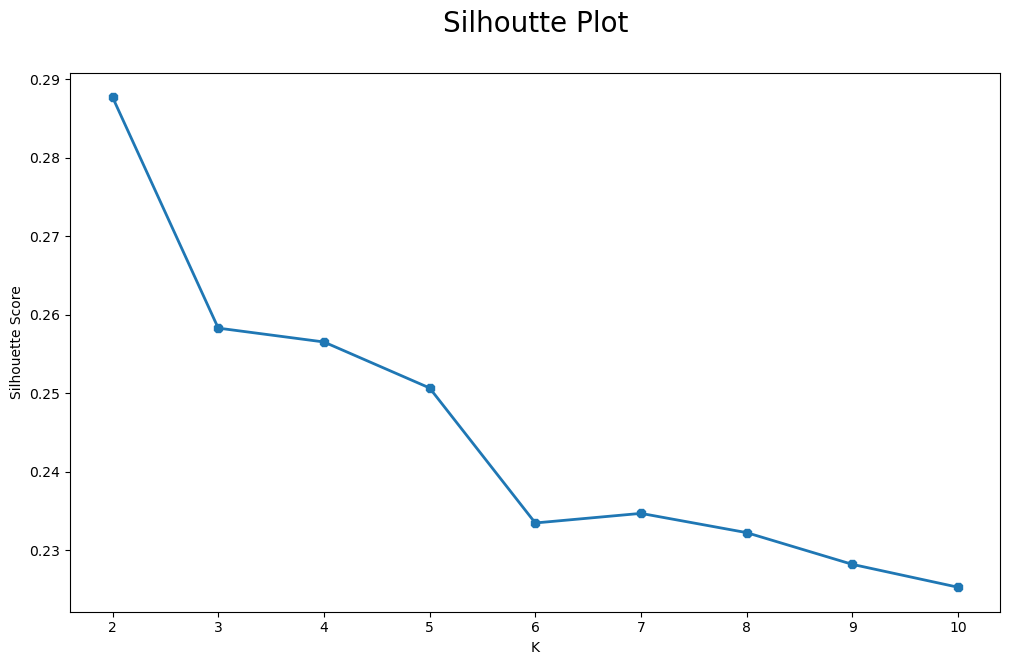

In [16]:
# create a plot of silhoutte score

silhouette_pca = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    
    predictions = kmeans.fit_predict(X_pca)
    silhouette_pca.append(metrics.silhouette_score(X_pca, predictions))

plt.figure(figsize = (12, 7))

plt.plot(range(2, 11), silhouette_pca, linewidth = 2, marker = '8')
plt.title('Silhoutte Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.show()

In [17]:
kmeans_pca = KMeans(n_clusters=2, random_state=42)

kmeans_pca.fit(X_pca)

/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=2, random_state=42)

In [18]:
# Generate labels for the  dataset

labels_pca = kmeans.fit_predict(X_pca)
labels_pca

/opt/anaconda3/envs/phase1/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([0, 2, 3, ..., 1, 1, 1], dtype=int32)

In [19]:
# output the centroids of your clusters

kmeans_pca.cluster_centers_

array([[-0.84939418, -0.08355256, -0.04931662],
       [ 1.59188245,  0.15658909,  0.09242618]])

In [20]:
X_pca

array([[-1.61011252,  0.42832901, -0.60192301],
       [-1.66248859, -1.67572294,  2.45086197],
       [-2.54537466,  1.14581434,  0.7668302 ],
       ...,
       [ 2.23098511,  0.07680817,  0.54250701],
       [ 1.77806118,  0.36472613,  1.21722707],
       [ 2.29758525,  0.19043016,  0.20156328]])

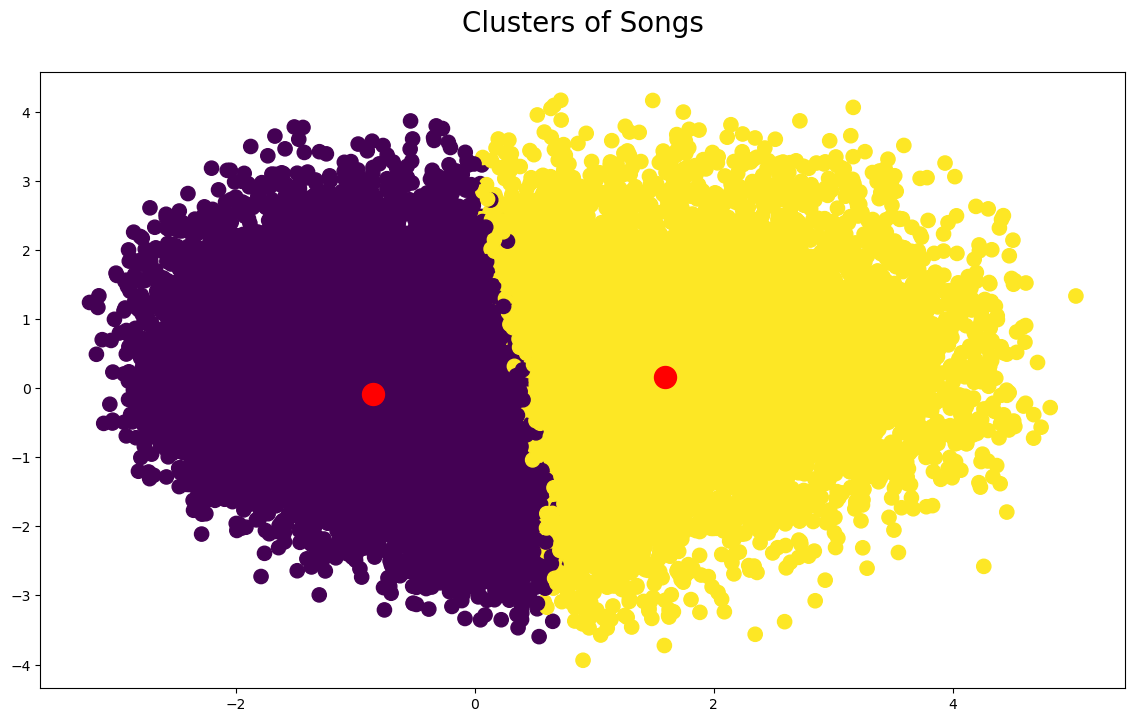

In [21]:
# view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X_pca[:, 0], X_pca[:, 1], c = kmeans_pca.labels_, s = 105)
plt.scatter(kmeans_pca.cluster_centers_[:, 0], kmeans_pca.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Clusters of Songs\n', fontsize = 20)

plt.show()

/var/folders/ys/2qy9g7jn07bb6gy1ycs8d8700000gn/T/ipykernel_66965/108499120.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))
/var/folders/ys/2qy9g7jn07bb6gy1ycs8d8700000gn/T/ipykernel_66965/108499120.py:7: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne[:, 0], X_tsne[:, 1],


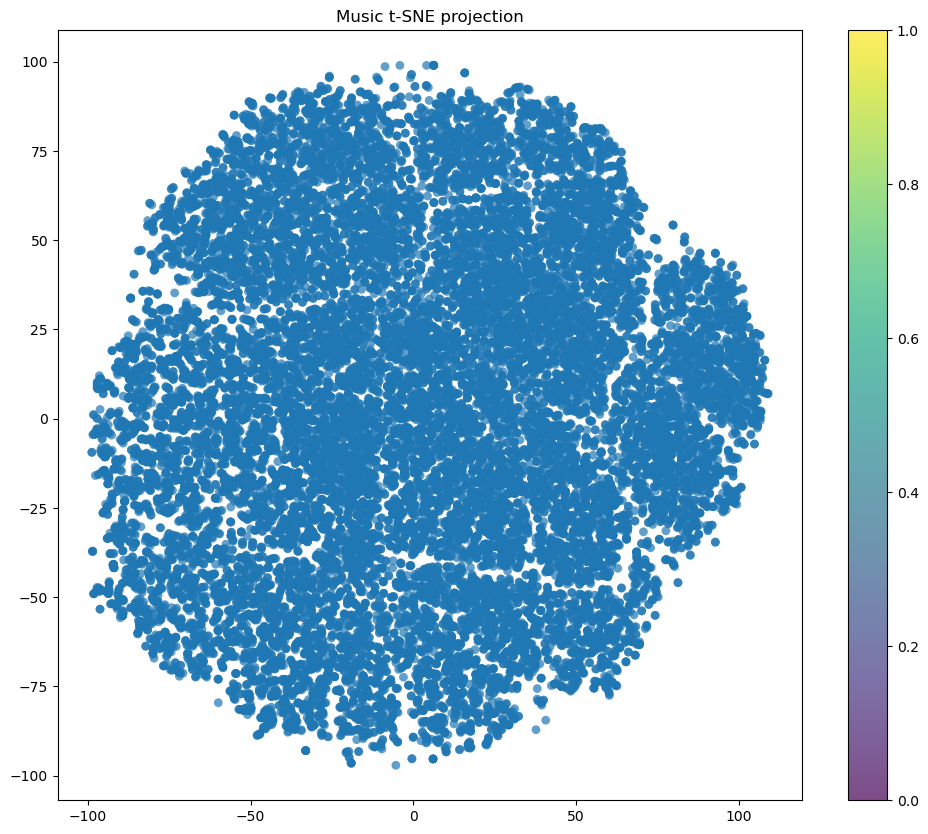

In [22]:
from sklearn.manifold import TSNE
tsne = TSNE(random_state=42)

X_tsne = tsne.fit_transform(X)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1],
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('Music t-SNE projection');

/var/folders/ys/2qy9g7jn07bb6gy1ycs8d8700000gn/T/ipykernel_66965/949394786.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('nipy_spectral', 10))
/var/folders/ys/2qy9g7jn07bb6gy1ycs8d8700000gn/T/ipykernel_66965/949394786.py:6: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_tsne_pca[:, 0], X_tsne_pca[:, 1],


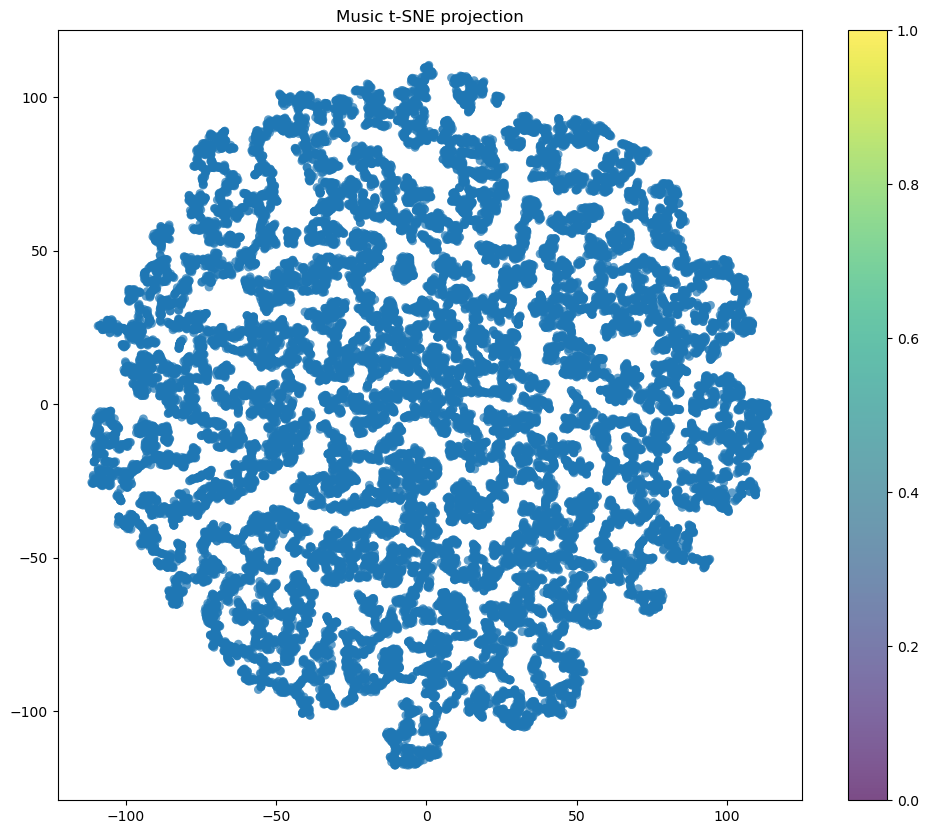

In [23]:
tsne = TSNE(random_state=42)

X_tsne_pca = tsne.fit_transform(X_pca)

plt.figure(figsize=(12,10))
plt.scatter(X_tsne_pca[:, 0], X_tsne_pca[:, 1],
            edgecolor='none', alpha=0.7, s=40,
            cmap=plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar()
plt.title('Music t-SNE projection');